O Que é Segmentação de Clientes?
A segmentação de clientes é o processo de dividir os clientes em grupos com base em características comuns, para que as empresas possam comercializar para cada grupo de forma eficaz e adequada, ou simplesmente compreender o padrão de consumo dos clientes.

##  Marketing B2B x Marketing B2C

No Marketing Business-to-Business (B2B), uma empresa pode segmentar clientes de acordo com uma ampla variedade de fatores, incluindo:

- Indústria
- Número de empregados
- Produtos comprados anteriormente na empresa
- Localização

No Marketing Business-to-Consumer (B2C), as empresas geralmente segmentam os clientes de acordo com dados demográficos e padrões de consumo, tal como:

- Idade
- Gênero
- Estado civil
- Localização (urbana, suburbana, rural)
- Estágio da vida (sem filhos, aposentado, etc.)
- Produtos comprados
- Valor gasto
- Horário de consumo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyclustertend import hopkins
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059


In [4]:
#Verificando a quantiade de valores Nan
data.isnull().sum()

id_transacao       0
horario_pedido     0
localidade         0
nome_item          0
quantidade_item    0
latitude           0
longitude          0
dtype: int64

In [5]:
data.dtypes

id_transacao        object
horario_pedido      object
localidade           int64
nome_item           object
quantidade_item      int64
latitude           float64
longitude          float64
dtype: object

In [6]:
#Verificando o formato 
data.shape

(260645, 7)

In [7]:
data.dtypes

id_transacao        object
horario_pedido      object
localidade           int64
nome_item           object
quantidade_item      int64
latitude           float64
longitude          float64
dtype: object

In [8]:
data.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059


In [9]:
#Retirar as variaveis latitude e longitude e usar apenas localidade. Retirar tb a coluna horario_pedido
data.drop(columns=['latitude','longitude'], axis=1, inplace= True)


In [10]:
data.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2
3,0x12b47f,2019-09-04 12:36:00,3,salada,1
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1


In [11]:
#verificando os tipos de itens
data['nome_item'].value_counts()

sobremesa    100000
pizza         76122
bebida        46156
salada        38367
Name: nome_item, dtype: int64

In [12]:
%%time


#Como tem ids do mesmo pedido, vamos transformar a coluna item em 4 colunas diferentes
# Lista para receber o total de pedidos
total_pedidos = []

# Extraímos cada id e cada grupo do 'group by' por id_transacao
for k, group in data.groupby('id_transacao'):
    
    # Extraímos cada id e cada grupo do group by por horario_pedido
    for m, n in group.groupby('horario_pedido'):
        
        # Extraímos cada item de cada grupo
        id_transacao = k
        horario_pedido = m
        localidade = n['localidade'].values.tolist()[0]
        bebida = 0
        pizza = 0
        sobremesa = 0
        salada = 0
        n = n.reset_index(drop = True)
        
        # E então contabilizamos os itens pedidos
        for i in range(len(n)):
            item = n.loc[i, 'nome_item']
            num = n.loc[i, 'quantidade_item']
            
            if item == 'bebida':
                bebida = bebida + num
            
            elif item == 'pizza':
                pizza = pizza + num
            
            elif item == 'sobremesa':
                sobremesa = sobremesa + num
            
            elif item == 'salada':
                salada = salada + num
        
        output = [id_transacao, horario_pedido, localidade, bebida, pizza, sobremesa, salada]
        total_pedidos.append(output)
        
print("\nAgrupamento concluído!")


Agrupamento concluído!
CPU times: user 1min 24s, sys: 41.2 ms, total: 1min 24s
Wall time: 1min 24s


In [13]:
# Convertemos a lista para dataframe
data_itens = pd.DataFrame(total_pedidos)

In [14]:
data_itens.head()

,0,1,2,3,4,5,6
0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0
1,0x100058,2019-05-05 00:08:00,6,0,2,2,0
2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1
3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0
4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0


In [15]:
# Ajustamos os nomes das colunas
data_itens.columns = ['id_transacao', 'horario_pedido', 'local', 'bebida', 'pizza', 'sobremesa', 'salada']

In [16]:
#Colocando o index por transação
data_itens.index
data_itens = data_itens.reset_index()

In [17]:
data_itens.head()

,index,id_transacao,horario_pedido,local,bebida,pizza,sobremesa,salada
0,0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0
1,1,0x100058,2019-05-05 00:08:00,6,0,2,2,0
2,2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1
3,3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0
4,4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0


In [18]:
#Verificando valores Nan
data_itens.isnull().sum()

index             0
id_transacao      0
horario_pedido    0
local             0
bebida            0
pizza             0
sobremesa         0
salada            0
dtype: int64

In [19]:
data_itens['horario_pedido'] = pd.to_datetime(data_itens['horario_pedido'], format='%Y-%m-%d %H:%M')

In [20]:
data_itens.dtypes

index                      int64
id_transacao              object
horario_pedido    datetime64[ns]
local                      int64
bebida                     int64
pizza                      int64
sobremesa                  int64
salada                     int64
dtype: object

In [21]:
data_itens['dia'] = data_itens['horario_pedido'].dt.day
data_itens['mes'] = data_itens['horario_pedido'].dt.month
data_itens['dia_semana'] = data_itens['horario_pedido'].dt.dayofweek
data_itens['hora'] = data_itens['horario_pedido'].dt.hour

In [22]:
data_itens.head()

,index,id_transacao,horario_pedido,local,bebida,pizza,sobremesa,salada,dia,mes,dia_semana,hora
0,0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0,29,1,1,0
1,1,0x100058,2019-05-05 00:08:00,6,0,2,2,0,5,5,6,0
2,2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1,28,1,0,19
3,3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0,23,2,5,0
4,4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0,30,6,6,17


In [23]:
#Retirar a coluna id_transacao
data_itens.drop(columns=['id_transacao','horario_pedido'], axis=1, inplace= True)

In [24]:
data_itens.isnull().sum()

index         0
local         0
bebida        0
pizza         0
sobremesa     0
salada        0
dia           0
mes           0
dia_semana    0
hora          0
dtype: int64

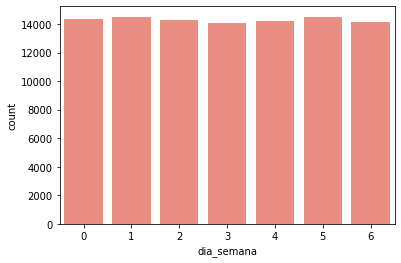

In [25]:
sns.countplot(x= 'dia_semana', data= data_itens, color="salmon")

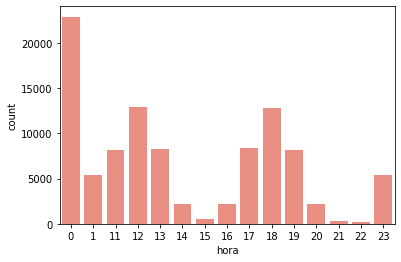

In [26]:
sns.countplot(x= 'hora', data= data_itens, color="salmon")

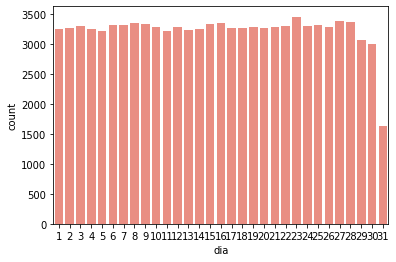

In [27]:
sns.countplot(x= 'dia', data= data_itens, color="salmon")

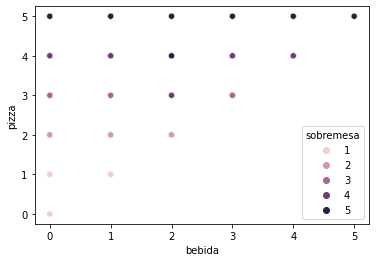

In [28]:
sns.scatterplot(x="bebida", y = "pizza",hue="sobremesa",data=data_itens)

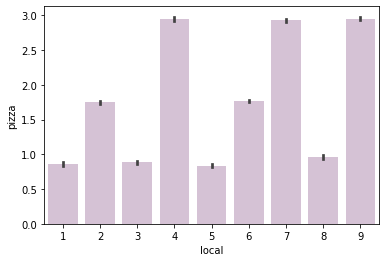

In [29]:
sns.barplot(x= 'local' , y= 'pizza',color = "thistle", data=data_itens)

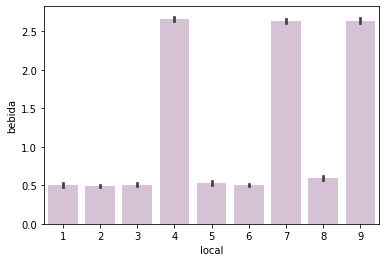

In [30]:
sns.barplot(x= 'local' , y= 'bebida',color = "thistle",data=data_itens)

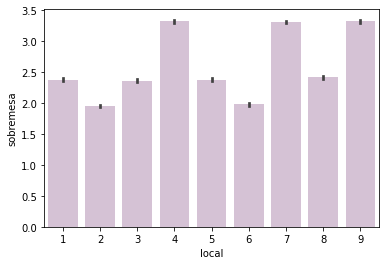

In [31]:
sns.barplot(x= 'local' , y= 'sobremesa',color = "thistle",data=data_itens)

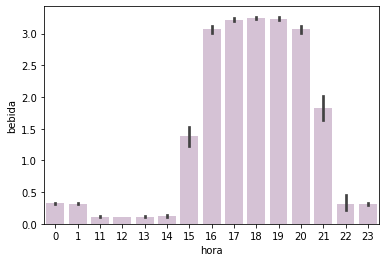

In [32]:
sns.barplot(x= 'hora' , y= 'bebida',color = "thistle",data=data_itens)

In [33]:
data_itens.drop('index', axis=1, inplace=True)

In [34]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_itens)  

In [35]:
data_itens.shape

(100000, 9)

In [36]:
#Verificando se os dados são clusterizaveis
hopkins(data_scaled,100000)

0.090726816373338

## Modelo 1-  Modelo Kmeans

In [37]:
# Vou pegar apenas 1% dos dados para não comprometero processamento
amostra1, amostra2 = train_test_split(data_scaled, train_size = .4)

In [38]:
amostra1.shape

(40000, 9)

In [39]:
# Determinando um range de K
k_range = range(1,15)

In [40]:
# Aplicando o modelo K-Means para cada valor de K 
k_means_var = [KMeans(n_clusters = k).fit(amostra1) for k in k_range]

In [41]:
# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [42]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(amostra1, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [43]:
# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [44]:
# Soma total dos quadrados
soma_total = sum(pdist(amostra1)**2)/amostra1.shape[0]

In [45]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

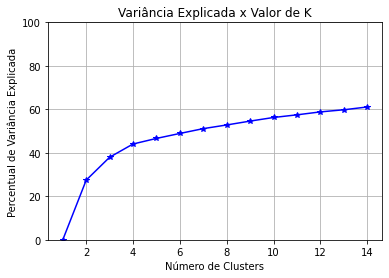

In [46]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

In [47]:
# Criando um modelo com K = 4
modelo_v1 = KMeans(n_clusters = 4)
modelo_v1.fit(amostra1)

KMeans(n_clusters=4)

In [48]:
# Silhouette Score
labels = modelo_v1.labels_
silhouette_score(amostra1, labels, metric = 'euclidean')

0.21629645100829967

In [49]:
#Redução da Dimensionalidade
pca = PCA (n_components = 2).fit(amostra1)

#Transformar os dados no novo espaço
pca_trans = pca.transform(amostra1)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1','pca2'])

grupos = pd.DataFrame(labels, columns = ['etiqueta'])
#concatena
kmeans_final = pd.concat([grupos,pca_trans_df], axis=1)
kmeans_final.head()

,etiqueta,pca1,pca2
0,3,-1.936476,0.055656
1,1,-1.083959,1.383123
2,2,-0.466903,-1.362585
3,0,2.218687,-1.234761
4,3,-1.556372,0.280038


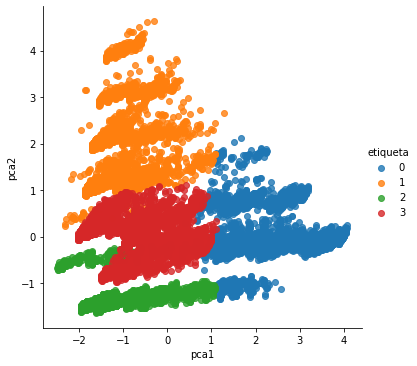

In [50]:
sns.lmplot(x='pca1', y='pca2', hue='etiqueta', fit_reg=False, data=kmeans_final)

## Modelo 2 - Kmeans sem as datas

In [51]:
data_itens.head()

,local,bebida,pizza,sobremesa,salada,dia,mes,dia_semana,hora
0,9,0,1,1,0,29,1,1,0
1,6,0,2,2,0,5,5,6,0
2,9,4,4,5,1,28,1,0,19
3,6,0,1,1,0,23,2,5,0
4,2,3,3,3,0,30,6,6,17


In [52]:
data_clean = data_itens.drop(columns=['dia','mes','dia_semana','hora'])

In [53]:
scaler = StandardScaler()
data_clean_scaled = scaler.fit_transform(data_clean)  

In [54]:
# Vou pegar apenas 1% dos dados para não comprometero processamento
amostra1b, amostra2b = train_test_split(data_clean_scaled, train_size = .4)

In [55]:
# Determinando um range de K
k_range = range(1,10)

In [56]:
# Aplicando o modelo K-Means para cada valor de K 
k_means_var = [KMeans(n_clusters = k).fit(amostra1b) for k in k_range]

In [57]:
# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [58]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(amostra1b, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [59]:
# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [60]:
# Soma total dos quadrados
soma_total = sum(pdist(amostra1b)**2)/amostra1.shape[0]

In [61]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

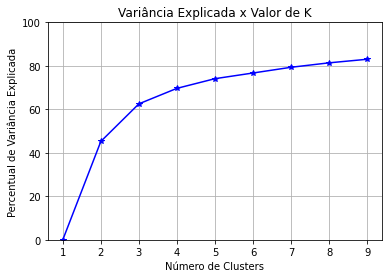

In [62]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

In [63]:
# Criando um modelo com K = 3


modelo_v2 = KMeans(n_clusters = 3,
                      init = 'k-means++', 
                      n_init = 10 ,
                      max_iter = 300, 
                      tol = 0.0001,  
                      random_state = 111  , 
                      algorithm = 'elkan')
modelo_v2.fit(amostra1b)

KMeans(algorithm='elkan', n_clusters=3, random_state=111)

In [64]:
# Silhouette Score
labels2 = modelo_v2.labels_
silhouette_score(amostra1b, labels2, metric = 'euclidean')

0.4230959532664764

In [65]:
#Redução da Dimensionalidade
pca = PCA (n_components = 2).fit(amostra1b)

#Transformar os dados no novo espaço
pca_trans = pca.transform(amostra1b)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1','pca2'])

grupos2 = pd.DataFrame(labels2, columns = ['etiqueta'])
#concatena
kmeans_final = pd.concat([grupos2,pca_trans_df], axis=1)
kmeans_final.head()

,etiqueta,pca1,pca2
0,1,-1.895788,1.846885
1,2,-0.683151,-0.940214
2,0,2.782825,0.111575
3,2,0.408858,-0.415067
4,0,1.733033,0.886221


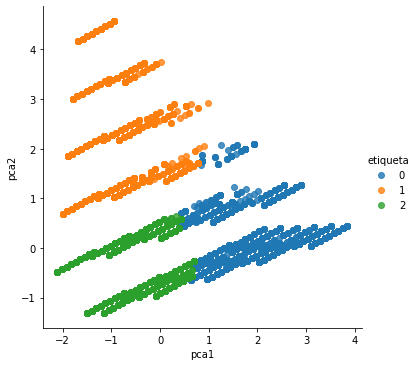

In [66]:
sns.lmplot(x='pca1', y='pca2', hue='etiqueta', fit_reg=False, data=kmeans_final)

## Modelo 3 - DBSCAN

In [67]:
ms = MeanShift( )
ms.fit(amostra1)

MeanShift()

In [ ]:
ms.